In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression



In [4]:
df=pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Data has 11 missing values. Hence, we discard them before we proceed with our EDA.

# EDA

In [7]:
print(list(df.columns))
print("-"*40)
print(df.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
----------------------------------------
(7043, 21)


In [8]:
round(df[['tenure','MonthlyCharges','TotalCharges']].describe(),1)


,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7032.0
mean,32.4,64.8,2283.3
std,24.6,30.1,2266.8
min,0.0,18.2,18.8
25%,9.0,35.5,401.4
50%,29.0,70.4,1397.5
75%,55.0,89.8,3794.7
max,72.0,118.8,8684.8


As we can see, the average time that a customer sticks with the telco is slightly more than 2 years.

Average the Monthly charges are $64.8 &the average total charges are $2283.3

In order to get a better understanding of our data, we decided to explore it visually.

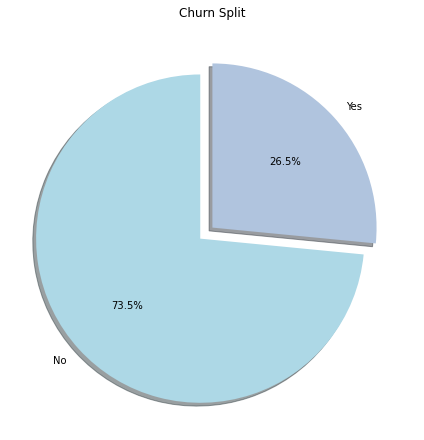

In [10]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*Counter(df["Churn"]).items())
colors = ['lightblue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

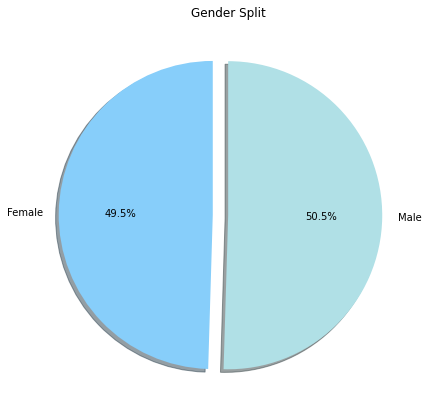

In [11]:
labels, values = zip(*Counter(df["gender"]).items())
colors = ['lightskyblue', 'powderblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

Our data is almost split down the middle when comparing the gender split.

We then plot our data across Tenure & Churn.

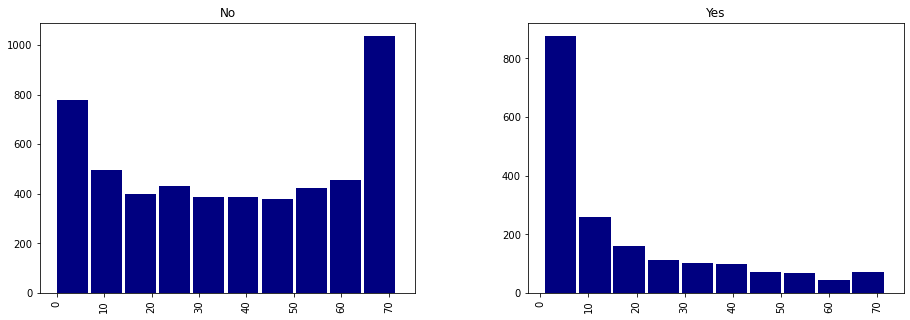

In [12]:
fig=df['tenure'].hist(by=df['Churn'],figsize=(15,5),width=6.5, color='navy' )
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

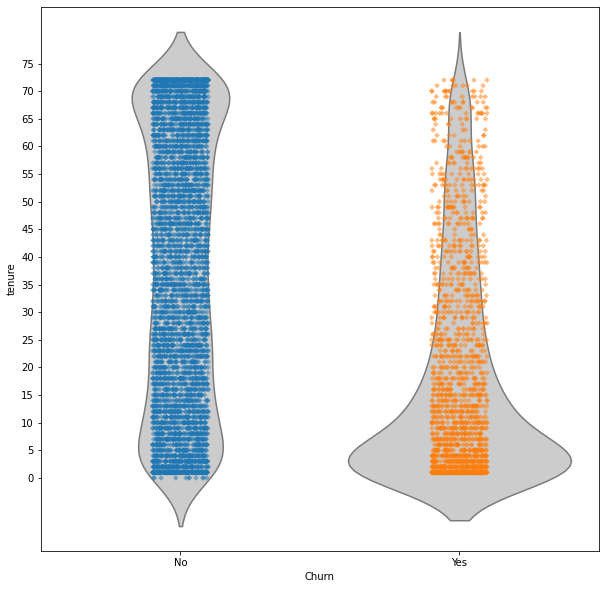

In [13]:
plt.subplots(figsize=(10,10))

g = sns.violinplot(x="Churn", y="tenure", data=df, inner=None,color="0.8")
g = sns.stripplot(x="Churn", y="tenure", data=df, jitter=True, marker="D", size=4, alpha=0.5,edgecolor="gray")

g.set_yticks(np.arange(0,80,5))
g

As we can see in the first chart, the bars are highest at 70 months & then less than 10 months. This may mean that most customers who stay with the company are either new ones or ones that have been with the company for around 6 years, i.e their most loyal customers.

On the other hand, if we look at customers who have quit, they are the highest in the first few months.

Our data consist of only 3 features which are continuous. The rest of our variables are categorical. For any kind of analysis, we need to encode the categorical data.

We do this using the Label Encoder package.

The feature customerID is unique & is not useful to us. Hence, we do not consider it in our analysis.

In [15]:
#transforming the data

df = df.apply(LabelEncoder().fit_transform)
df = df.drop('customerID',axis=1)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1


In [18]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.000353,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.105715,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.343056,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,0.085487,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.864756,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.084816,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.461992,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.208128,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.247783,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.141258,0.352562,-0.195525


<AxesSubplot:>

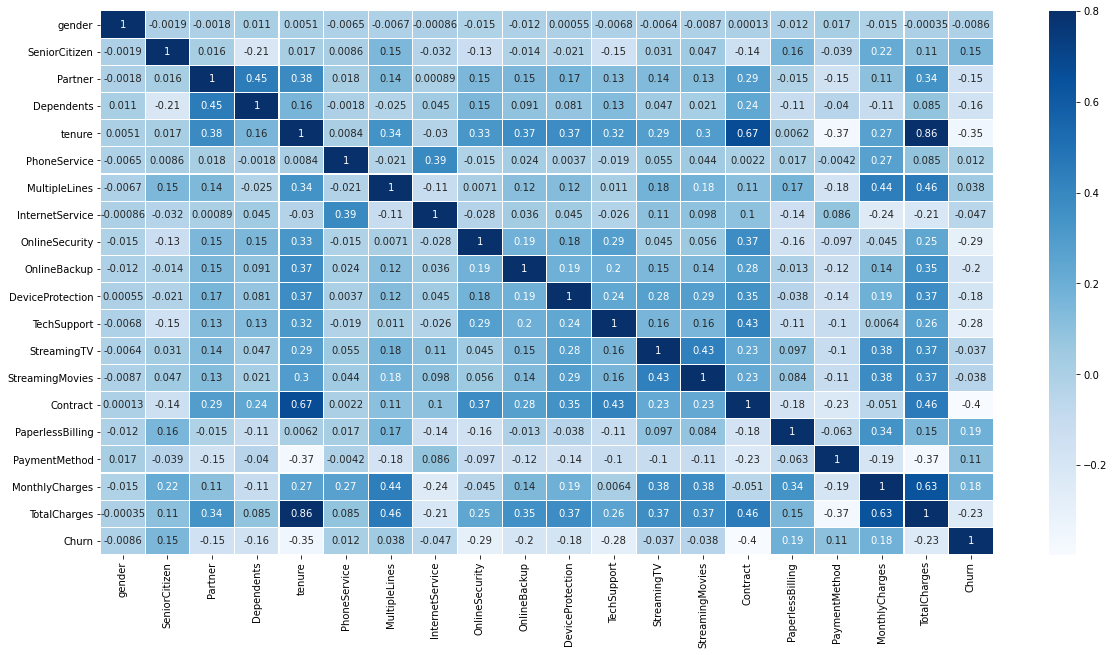

In [19]:
# Correlation Plot
corrmat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
colormap = plt.cm.Blues
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

Variables, TotalCharges, MonthlyCharges & Tenure are the variables which seem highly correlated which seems obvious. TotalCharges is nothing but MonthlyCharges times Tenure. To avoid multicollinearity, we get rid of the TotalCharges feature in our analysis.

In [23]:
#Splitting the data into features & target

x = df.iloc[:,:-2]
y = df[["Churn"]]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=0,stratify=y)
#scaling the data

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

# Model 1 - Logistic Regression

In [30]:
lg=LogisticRegression()

In [31]:
lg.fit(x_train,y_train)

LogisticRegression()

In [32]:
pred=lg.predict(x_test)
print (pred)

[0 0 1 ... 0 1 0]


In [33]:
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.7941315664931378


In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.64      0.53      0.58       561

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



# DECISION TREE CLASSIFIER

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7169900615238997
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1552
           1       0.47      0.48      0.48       561

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.7808802650260294
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.62      0.46      0.53       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



# Support Factor Classifier

In [41]:
from sklearn.svm import SVC

In [42]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.73450070989115
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



# Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc,x,y,cv=5).mean())
print(cross_val_score(svc,x,y,cv=5).mean())
print(cross_val_score(rfc,x,y,cv=5).mean())
print(cross_val_score(lg,x,y,cv=5).mean())

0.7200026009742564
0.7346301575908123
0.7854620661010389
0.80320867475321


difference

lg=1

dtc=0.8

rfc=0

svc=0.9

# Hyper Tunning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameter= {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [50]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [51]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [52]:
GCV.best_params_

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}

In [53]:
final_mod=RandomForestClassifier(bootstrap='True',max_depth=10,max_features='auto',n_estimators=13)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.56128726928537


In [54]:
final_mod

RandomForestClassifier(bootstrap='True', max_depth=10, n_estimators=13)

# SAVING THE MODEL

In [55]:
import joblib
joblib.dump(final_mod,"customerchurn.pkl")

['customerchurn.pkl']